# Práctica de NLP con Python y Google Colab para n-gramas

## Importar librerías

In [6]:
import nltk
from nltk.util import ngrams
from nltk import FreqDist
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt

In [12]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

## 1. Cargamos el texto del libro "Alicia en el país de las maravillas" desde un repositorio de GitHub o de otro lugar.


In [7]:
url = "https://www.gutenberg.org/files/11/11-0.txt"  # Alicia en el país de las maravillas

response = requests.get(url)
response.encoding = 'utf-8'
text = response.text

texto = pd.read_csv(io.StringIO(text), header=None, names=["texto"], sep=None, engine="python", on_bad_lines='warn')

Se truncaron las últimas líneas 5000 del resultado de transmisión.

  texto = pd.read_csv(io.StringIO(text), header=None, names=["texto"], sep=None, engine="python", on_bad_lines='warn')
<ipython-input-7-6fc9e5349fd5>:9: ParserWarning: Skipping line 1072: Expected 9 fields in line 1072, saw 15

  texto = pd.read_csv(io.StringIO(text), header=None, names=["texto"], sep=None, engine="python", on_bad_lines='warn')
<ipython-input-7-6fc9e5349fd5>:9: ParserWarning: Skipping line 1073: Expected 9 fields in line 1073, saw 15

  texto = pd.read_csv(io.StringIO(text), header=None, names=["texto"], sep=None, engine="python", on_bad_lines='warn')
<ipython-input-7-6fc9e5349fd5>:9: ParserWarning: Skipping line 1074: Expected 9 fields in line 1074, saw 12

  texto = pd.read_csv(io.StringIO(text), header=None, names=["texto"], sep=None, engine="python", on_bad_lines='warn')
<ipython-input-7-6fc9e5349fd5>:9: ParserWarning: Skipping line 1075: Expected 9 fields in line 1075, saw 16

  texto = pd.read_cs

## 2. Tokenizamos el texto utilizando la función word_tokenize de NLTK.

In [13]:
# Concatenar las líneas del texto, ignoring None values
texto_concatenado = " ".join(str(x) for x in texto["texto"] if x is not None)

# Tokenizar el texto
tokens = nltk.word_tokenize(texto_concatenado)

## 3. Generamos n-gramas de longitud 2 utilizando la función ngrams de NLTK.

In [14]:
longitud_ngramas = 2 # Se puede cambiar longitud de 3, 4 5 etc

# Generar n-gramas
ngramas = list(ngrams(tokens, longitud_ngramas))

## 4. Mostramos los 10 primeros n-gramas.

In [15]:
print(ngramas[:10])

[('*', '*'), ('*', '*'), ('*', 'Pepper'), ('Pepper', 'again'), ('again', '.'), ('.', 'true'), ('true', '.'), ('.', ')'), (')', 'and'), ('and', 'off')]


## 5. Generamos n-gramas de longitud 3 y mostramos los 10 primeros.

In [16]:
ngramas_3 = ngrams(tokens, 3)

In [17]:
print(list(ngramas_3)[:10])

[('*', '*', '*'), ('*', '*', 'Pepper'), ('*', 'Pepper', 'again'), ('Pepper', 'again', '.'), ('again', '.', 'true'), ('.', 'true', '.'), ('true', '.', ')'), ('.', ')', 'and'), (')', 'and', 'off'), ('and', 'off', '.')]


## 6. Creamos una gráfica de frecuencia de n-gramas utilizando la función FreqDist de NLTK y la biblioteca matplotlib.

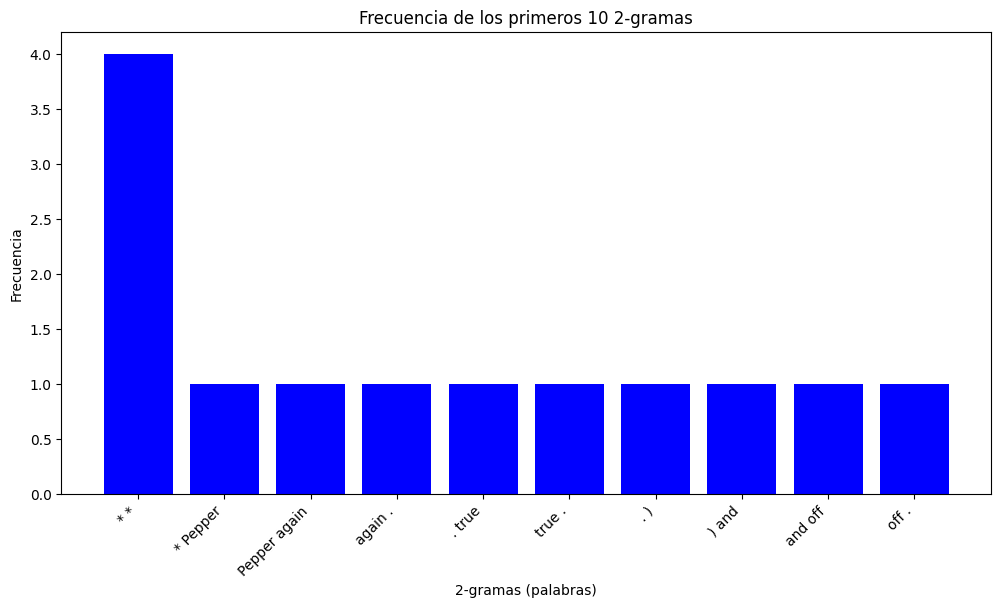

In [31]:

freq_ngramas = FreqDist(ngramas)

# --- Gráfica 1: Frecuencia de todos los n-gramas ---
ngramas_unicos = list(freq_ngramas.keys())
frecuencias = list(freq_ngramas.values())

plt.figure(figsize=(12, 6))
plt.bar([" ".join(ng) for ng in ngramas_unicos[:10]], frecuencias[:10], color='blue')
plt.xlabel(f"{longitud_ngramas}-gramas (palabras)")
plt.ylabel("Frecuencia")
plt.title(f"Frecuencia de los primeros 10 {longitud_ngramas}-gramas")
plt.xticks(rotation=45, ha='right')
plt.show()


## 7. Creamos una gráfica de distribución de frecuencias de n-gramas utilizando la función hist de matplotlib.

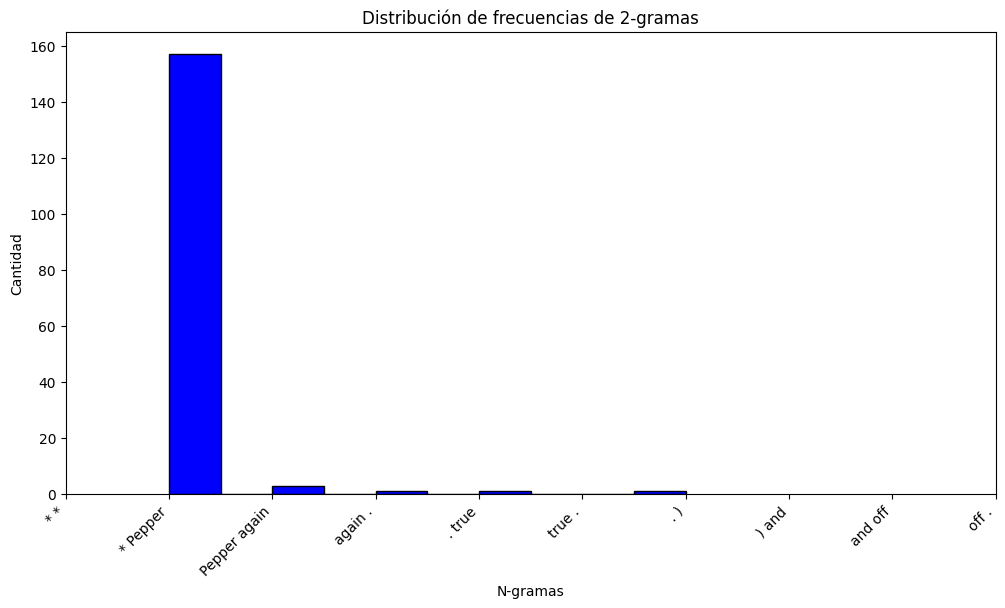

In [37]:
# --- Gráfica 2: Distribución de frecuencias de n-gramas con palabras ---
# Obtenemos una lista de las frecuencias
frecuencias = list(freq_ngramas.values())

# Ploteamos la distribución de frecuencias
plt.figure(figsize=(12, 6))
plt.hist(frecuencias, bins=10, color='blue', edgecolor='black')

# Crear las etiquetas de las barras con los n-gramas
plt.xticks(ticks=range(10), labels=[" ".join(ng) for ng in list(freq_ngramas.keys())[:10]], rotation=45, ha='right')

plt.xlabel("N-gramas")
plt.ylabel("Cantidad")
plt.title(f"Distribución de frecuencias de {longitud_ngramas}-gramas")
plt.show()

## 8. Creamos una gráfica de n-gramas más frecuentes utilizando la función most_common de FreqDist y la biblioteca matplotlib.

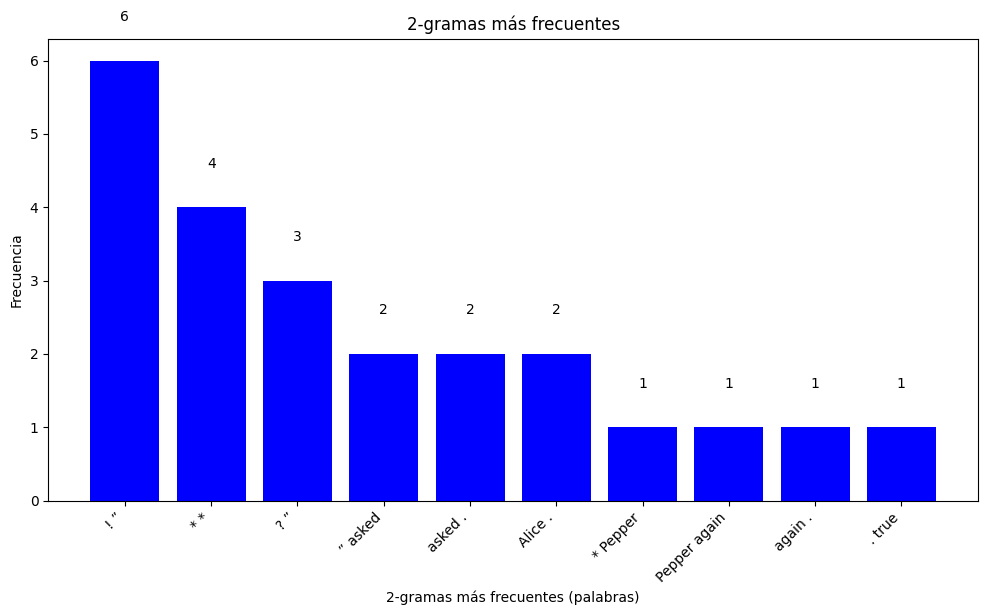

In [35]:
# --- Gráfica 3: Los n-gramas más frecuentes ---
ngramas_mas_frecuentes = freq_ngramas.most_common(10)

plt.figure(figsize=(12, 6))
valores_x = [" ".join(ng[0]) for ng in ngramas_mas_frecuentes]
valores_y = [ng[1] for ng in ngramas_mas_frecuentes]

plt.bar(valores_x, valores_y, color='blue')
plt.xlabel(f"{longitud_ngramas}-gramas más frecuentes (palabras)")
plt.ylabel("Frecuencia")
plt.title(f"{longitud_ngramas}-gramas más frecuentes")
plt.xticks(rotation=45, ha='right')

# Añadir etiquetas de valores sobre las barras
for i, valor in enumerate(valores_y):
    plt.text(i, valor + 0.5, str(valor), ha='center', va='bottom', fontsize=10, color='black')

plt.show()

## Documentaciones
[NLTK doc](http://www.nltk.org/book/ch01.html)

[Python doc](https://www.python.org/doc/)

[Matplolib.org](https://matplotlib.org/stable/index.html)